密度估计

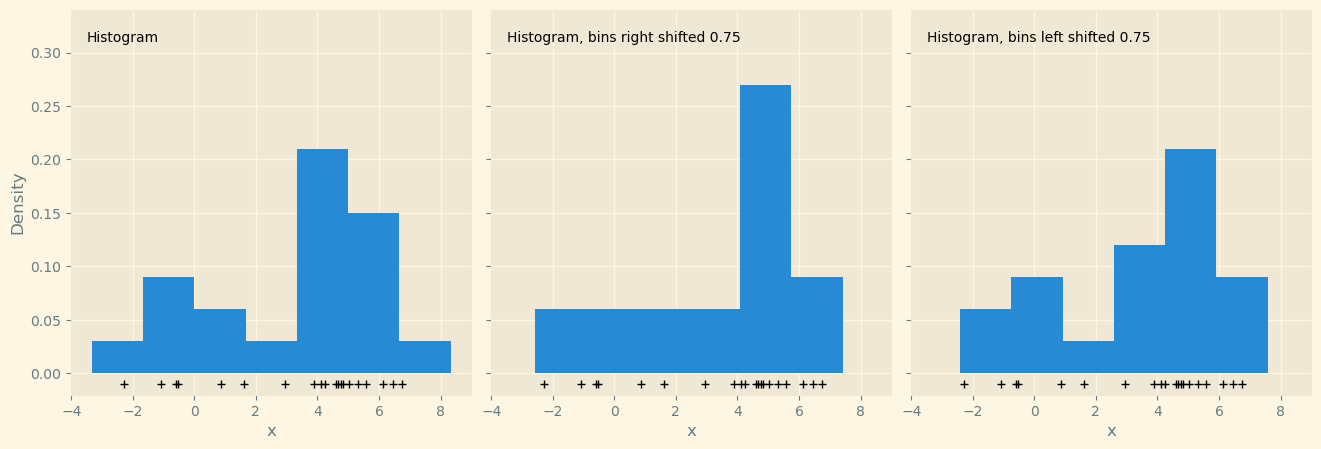

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

np.random.seed(1)
N = 20
X = np.concatenate((norm.rvs(0, 1, int(0.3 * N)), norm.rvs(5, 1, int(0.7 * N))))
bins = np.linspace(-5, 10, 10)

with plt.style.context('Solarize_Light2'):

    fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16, 5))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    ax[0].hist(X, bins=bins, density=True)
    ax[0].text(-3.5, 0.31, "Histogram")
    ax[0].set_ylabel('Density')

    ax[1].hist(X, bins=bins + 0.75, density=True)
    ax[1].text(-3.5, 0.31, "Histogram, bins right shifted 0.75")

    ax[2].hist(X, bins=bins - 0.75, density=True)
    ax[2].text(-3.5, 0.31, "Histogram, bins left shifted 0.75")

    for axi in ax.ravel():
        axi.plot(X, np.full(len(X), -0.01), '+k')
        axi.set_xlim(-4, 9)
        axi.set_ylim(-0.02, 0.34)
        axi.set_xlabel('x')

    plt.savefig('density-estimation-1.svg')
    plt.show()

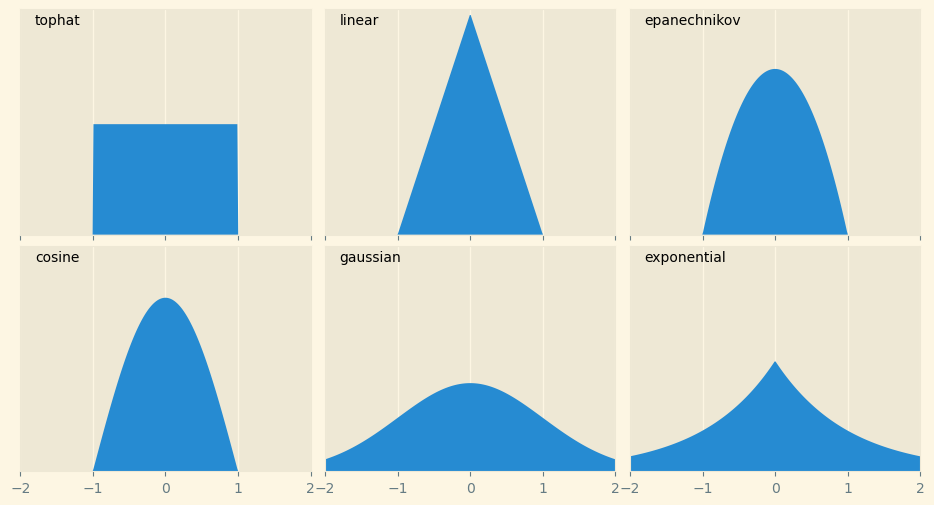

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

np.random.seed(1)

X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

with plt.style.context('Solarize_Light2'):

    fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))
    fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

    for i, kernel in enumerate(['tophat', 'linear', 'epanechnikov', 'cosine', 'gaussian', 'exponential']):
        axi = ax.ravel()[i]
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
        axi.fill(X_plot[:, 0], np.exp(log_dens))
        axi.text(-1.8, 0.95, kernel)
        axi.xaxis.set_major_locator(plt.MultipleLocator(1))
        axi.yaxis.set_major_locator(plt.NullLocator())
        axi.set_xlim(-2, 2)
        axi.set_ylim(0, 1.02)

    plt.savefig('density-estimation-2.svg')
    plt.show()

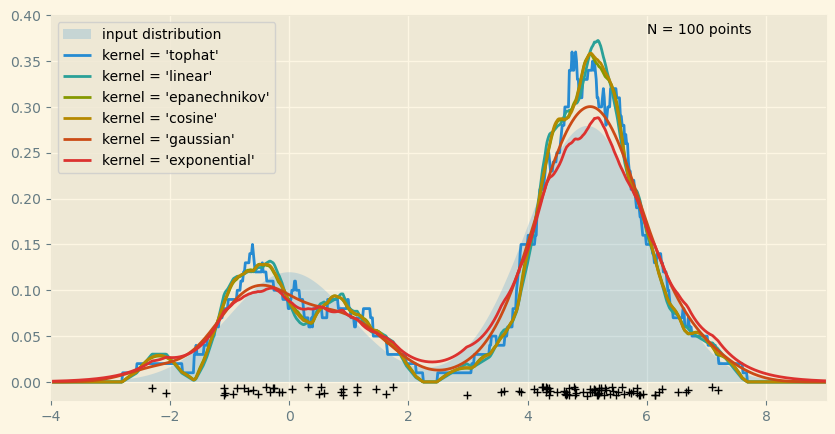

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.neighbors import KernelDensity

np.random.seed(1)
N = 100
X = np.concatenate((st.norm.rvs(0, 1, int(0.3 * N)),
                    st.norm.rvs(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * st.norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * st.norm(5, 1).pdf(X_plot[:, 0]))

with plt.style.context('Solarize_Light2'):

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.fill(X_plot[:, 0], true_dens, alpha=0.2, label='input distribution')
    kernels = ['tophat', 'linear', 'epanechnikov', 'cosine', 'gaussian', 'exponential']

    for kernel in kernels:
        log_dens = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X).score_samples(X_plot)
        ax.plot(X_plot[:, 0], np.exp(log_dens), lw=2, linestyle='-', label="kernel = '{0}'".format(kernel))

    ax.text(6, 0.38, "N = {0} points".format(N))
    ax.legend(loc='upper left')
    ax.plot(X[:, 0], -0.005 - 0.01 * st.uniform.rvs(size=X.shape[0]), '+k')
    ax.set_xlim(-4, 9)
    ax.set_ylim(-0.02, 0.4)

    plt.savefig('density-estimation-3.svg')
    plt.show()